# How To Use Varix

Varix is our implementation of a variational autoencoder.  
This tutorial follows the structure of our `Getting Started - Vanillix`, but is much less extensive, because  
our pipeline works similarly for different architectures, so here we focus only on Varix specifics.

**AUTOENCODIX** supports far more functionality than shown here, so we’ll also point to advanced tutorials where relevant.  

**IMPORTANT**

> This tutorial only shows the specifics of the Varix pipeline. If you're unfamiliar with general concepts,  
> we recommend following the `Getting Started - Vanillix` tutorial first.

## What You'll Learn

You’ll learn how to:

1. **Initialize** the pipeline and run the pipeline. <br><br>
2. Understand the Varix-specific **pipeline steps**. <br><br>
3. Access the Varix-specific **results** (mus, sigma, KL/MMD losses). <br><br>
4. **Visualize** outputs effectively. <br><br>
5. Apply **custom parameters**. <br><br>
6. **Save, load, and reuse** a trained pipeline. <br><br>

Let’s get started! 🚀


## 1) Initialize and Run Varix

We set a few custom parameters of the config file. For a deep dive into the config object, see:  

`Tutorials/DeepDives/ConfigTutorial.ipynb`

#### 1.1 The Dataset

Here, we provide a mock single-cell dataset as a `MuData` object in our custom `DataPackage` structure.


In [ ]:
from autoencodix.utils.example_data import EXAMPLE_MULTI_SC
from autoencodix.configs.varix_config import VarixConfig
from autoencodix.configs.default_config import DataCase
import autoencodix as acx

# Varix has its own config class
# with an additional loss term: either Kullback-Leibler (KL) or Maximum Mean Discrepancy (MMD)
# Instead of passing a pandas DataFrame, we use a pre-defined DataPackage object directly,
# this time with single-cell data.

print("Input data:")
print(EXAMPLE_MULTI_SC)
print("-" * 50)

my_config = VarixConfig(
    learning_rate=0.001,
    epochs=33,
    checkpoint_interval=5,
    default_vae_loss="kl",  # 'kl' or 'mmd' possible
    data_case=DataCase.MULTI_SINGLE_CELL,
)

print("\nStarting Pipeline")
print("-" * 50)
varix = acx.Varix(data=EXAMPLE_MULTI_SC, config=my_config)
result = varix.run()


Input data:
multi_sc:
  multi_sc: 1000 samples × 700 features
--------------------------------------------------

Starting Pipeline
--------------------------------------------------
in handle_direct_user_data with data: <class 'autoencodix.data.datapackage.DataPackage'>
mudata: View of MuData object with n_obs × n_vars = 1000 × 700
  2 modalities
    rna:	1000 x 500
      obs:	'cell_type', 'batch', 'donor', 'cell_cycle'
    protein:	1000 x 200
      obs:	'cell_type', 'batch', 'donor', 'cell_cycle'
Processing 1 MuData objects: ['multi_sc']
Processing train modality: multi_sc
Processing valid split
Processing valid modality: multi_sc
Processing test split
Processing test modality: multi_sc
type of x in combine layers: <class 'numpy.ndarray'>
type of x in combine layers: <class 'numpy.ndarray'>
type of x in combine layers: <class 'numpy.ndarray'>
type of x in combine layers: <class 'numpy.ndarray'>
type of x in combine layers: <class 'numpy.ndarray'>
type of x in combine layers: <class '

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Epoch 1 - Train Loss: 28.1450
Sub-losses: recon_loss: 28.1450, var_loss: 0.0000, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 1 - Valid Loss: 23.1588
Sub-losses: recon_loss: 23.1588, var_loss: 0.0000, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 2 - Train Loss: 25.8663
Sub-losses: recon_loss: 25.8663, var_loss: 0.0000, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 2 - Valid Loss: 23.3498
Sub-losses: recon_loss: 23.3498, var_loss: 0.0000, anneal_factor: 0.0001, effective_beta_factor: 0.0000
Epoch 3 - Train Loss: 24.0179
Sub-losses: recon_loss: 24.0178, var_loss: 0.0001, anneal_factor: 0.0002, effective_beta_factor: 0.0000
Epoch 3 - Valid Loss: 22.8409
Sub-losses: recon_loss: 22.8409, var_loss: 0.0000, anneal_factor: 0.0002, effective_beta_factor: 0.0000
Epoch 4 - Train Loss: 23.2854
Sub-losses: recon_loss: 23.2853, var_loss: 0.0001, anneal_factor: 0.0003, effective_beta_factor: 0.0000
Epoch 4 - Valid Loss: 21.8666
Sub-losses: recon_loss: 21.8665,

In [4]:
backup_dataset = result.datasets

In [6]:
result.datasets.train.metadata

,rna:cell_type,rna:batch,rna:donor,rna:cell_cycle,rna:n_genes,protein:cell_type,protein:batch,protein:donor,protein:cell_cycle,protein:n_genes
cell_0,type_0,batch2,donor2,S,346,type_0,batch2,donor2,S,150
cell_189,type_3,batch2,donor2,G2M,368,type_3,batch2,donor2,G2M,155
cell_19,type_3,batch1,donor1,G1,345,type_3,batch1,donor1,G1,147
cell_191,type_0,batch3,donor2,S,349,type_0,batch3,donor2,S,150
cell_192,type_1,batch2,donor1,S,346,type_1,batch2,donor1,S,146
...,...,...,...,...,...,...,...,...,...,...
cell_995,type_1,batch1,donor3,G2M,361,type_1,batch1,donor3,G2M,143
cell_996,type_3,batch1,donor2,G2M,342,type_3,batch1,donor2,G2M,150
cell_997,type_1,batch3,donor1,G2M,347,type_1,batch3,donor1,G2M,148
cell_998,type_1,batch2,donor4,S,341,type_1,batch2,donor4,S,146


## 2) Specific Varix Steps (with Beta Annealing Explanation)

The pipeline (`run`) does not have Varix-specific steps.  
It calls:
- preprocess  
- fit  
- predict  
- visualize  

However, the fit step works slightly differently because we have a second loss term for the distribution loss.  
This loss term can be weighted with a hyperparameter `beta` (set via config), and the weighting can be changed during training depending on the epoch via **beta annealing**.  

**Beta annealing** gradually increases the weight of the VAE distribution loss during training.  
For example, you might start with `beta=0` to let the reconstruction loss dominate early, and then gradually increase `beta` to 1 as training progresses.  
Different annealing strategies are supported, including logistic schedules, multi-phase linear or logarithmic schedules, and constant or no annealing.  
This allows more stable training and better latent space learning, especially for early epochs.

Since we're working with a variational autoencoder, we can call an additional pipeline step, `sample_latent_space`.  
The latent space inside the pipeline is sampled once from the fitted normal distribution, with one set of `mu` and `sigma` per latent dimension.  

By default, we sample from the trained model and the test data, but you can specify the split and epoch.

**ATTENTION**   <br><br>
> If you want to sample from a different split (uses data from that split as input) or epoch (uses the model at this epoch), you need to ensure you select an epoch that was checkpointed (see `checkpoint_interval` config parameter).


In [7]:
print(f"Annealing Strategy for training was: {my_config.anneal_function}")
print(f"beta hyperparam was set to: {my_config.beta}")
print("\n")
print("Starting sampling different latent spaces")
print("-"*50)
latent_spaces = {}
for i in range (4):
    latent_spaces[i] = varix.sample_latent_space()

# or
sampled = varix.sample_latent_space(split="train", epoch=4)
sampled

Annealing Strategy for training was: logistic-mid
beta hyperparam was set to: 0.1


Starting sampling different latent spaces
--------------------------------------------------


tensor([[ 2.2624e+00,  5.6386e-01,  3.5105e+00,  ..., -4.4136e-01,
          5.3326e-01, -3.2333e-01],
        [ 2.1559e+00,  3.8693e-01,  4.6184e+00,  ...,  6.4145e-01,
         -2.2685e+00,  5.9601e-01],
        [-1.4522e+00,  1.2383e+00,  1.2148e+00,  ..., -3.0760e-01,
          5.8166e-01, -1.2171e-03],
        ...,
        [ 1.6653e-01, -2.6453e-01,  4.8106e-01,  ..., -8.7983e-01,
          9.5364e-01,  1.6866e-01],
        [ 1.3911e+00,  1.0085e+00, -9.1007e-01,  ..., -1.8901e+00,
          3.7815e-01,  2.2821e-01],
        [ 3.7199e-01,  5.9190e-01, -1.4701e+00,  ...,  1.0628e+00,
         -5.4062e-01, -1.3354e-01]], device='mps:0')

## 3) Inspect Varix-Specific Results

In addition to the results that the Vanillix pipeline provided, we can access:
- Fitted distribution parameters `mu` and `sigma`  
- `total`, `reconstruction`, and `vae` losses  
- `anneal_factor`  

A note on the different loss types:  
For our variational autoencoder, the total loss consists of a reconstruction loss and a distribution loss (i.e., KL-divergence).  
To investigate these losses, the `result` object has the attribute `sub_losses`.  
This is a `LossRegistry` with the name of the loss as the key, and the value is a `TrainingDynamics` object, which can be accessed in the same way as for the Vanillix results.

For more details, check `Tutorials/DeepDives/PipelineOutputTutorial.ipynb`.


In [8]:
sub_losses = result.sub_losses
print("Sub Losses:")
print(f"keys: {sub_losses.keys()}")
print("\n")
recon_dyn = sub_losses.get(key="recon_loss")
print("Value of reconstruction loss in epoch 4 for train split")
print(recon_dyn.get(split="train", epoch=4))

Sub Losses:
keys: dict_keys(['recon_loss', 'var_loss', 'anneal_factor', 'effective_beta_factor'])


Value of reconstruction loss in epoch 4 for train split
22.31997009277344


In [9]:
mu = result.mus.get(split="valid", epoch=9)
mu

array([[0.        , 0.08424317, 0.12423155, ..., 0.        , 0.        ,
        0.        ],
       [0.14789696, 0.        , 0.8358016 , ..., 0.        , 0.        ,
        0.        ],
       [0.22761813, 0.        , 0.48072138, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.6101082 , 0.        , 0.2542605 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.8191644 , 0.4728171 , ..., 1.3507618 , 0.26686513,
        0.        ],
       [0.04539063, 0.40556276, 0.23966756, ..., 0.        , 0.        ,
        0.        ]], shape=(100, 16), dtype=float32)

## 4) Show Visualizations

This follows the standard pipeline process and can be done by calling `show_result()`.  
We can also add the keyword argument `params` to `show_result()`, which colors the plots according to a metadata column.


Creating plots ...


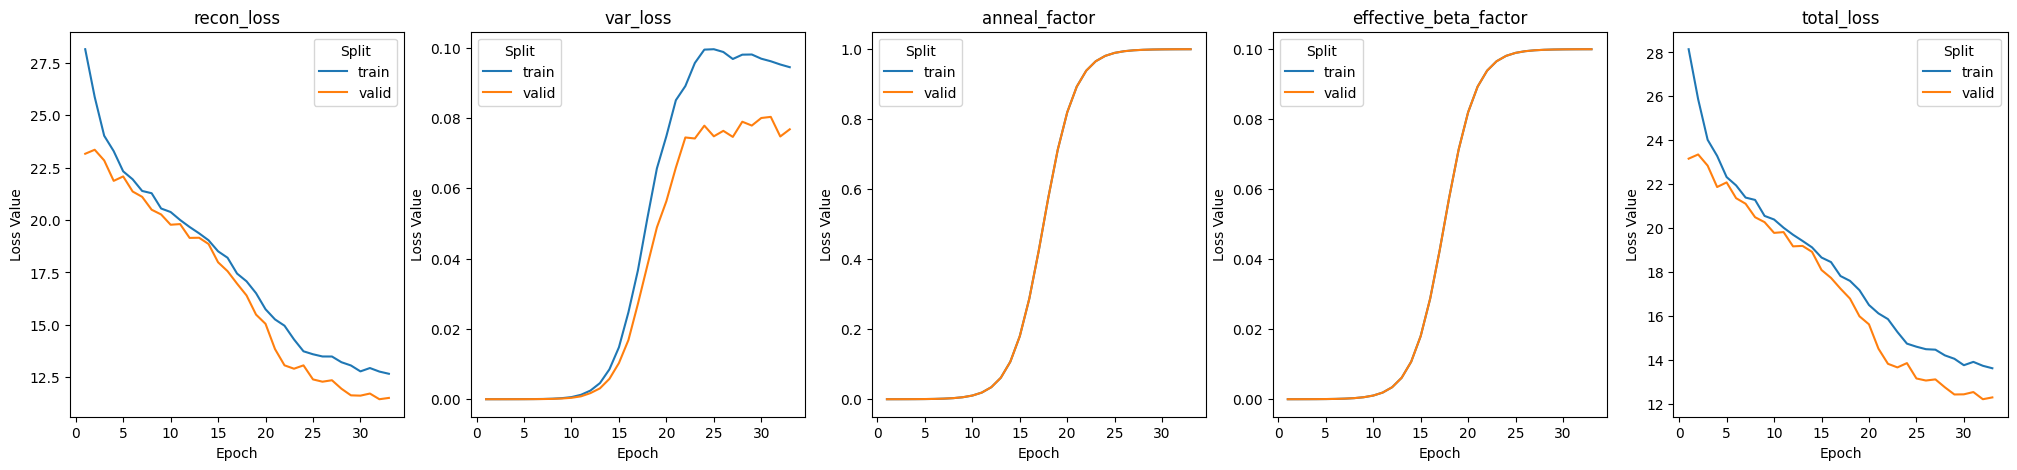

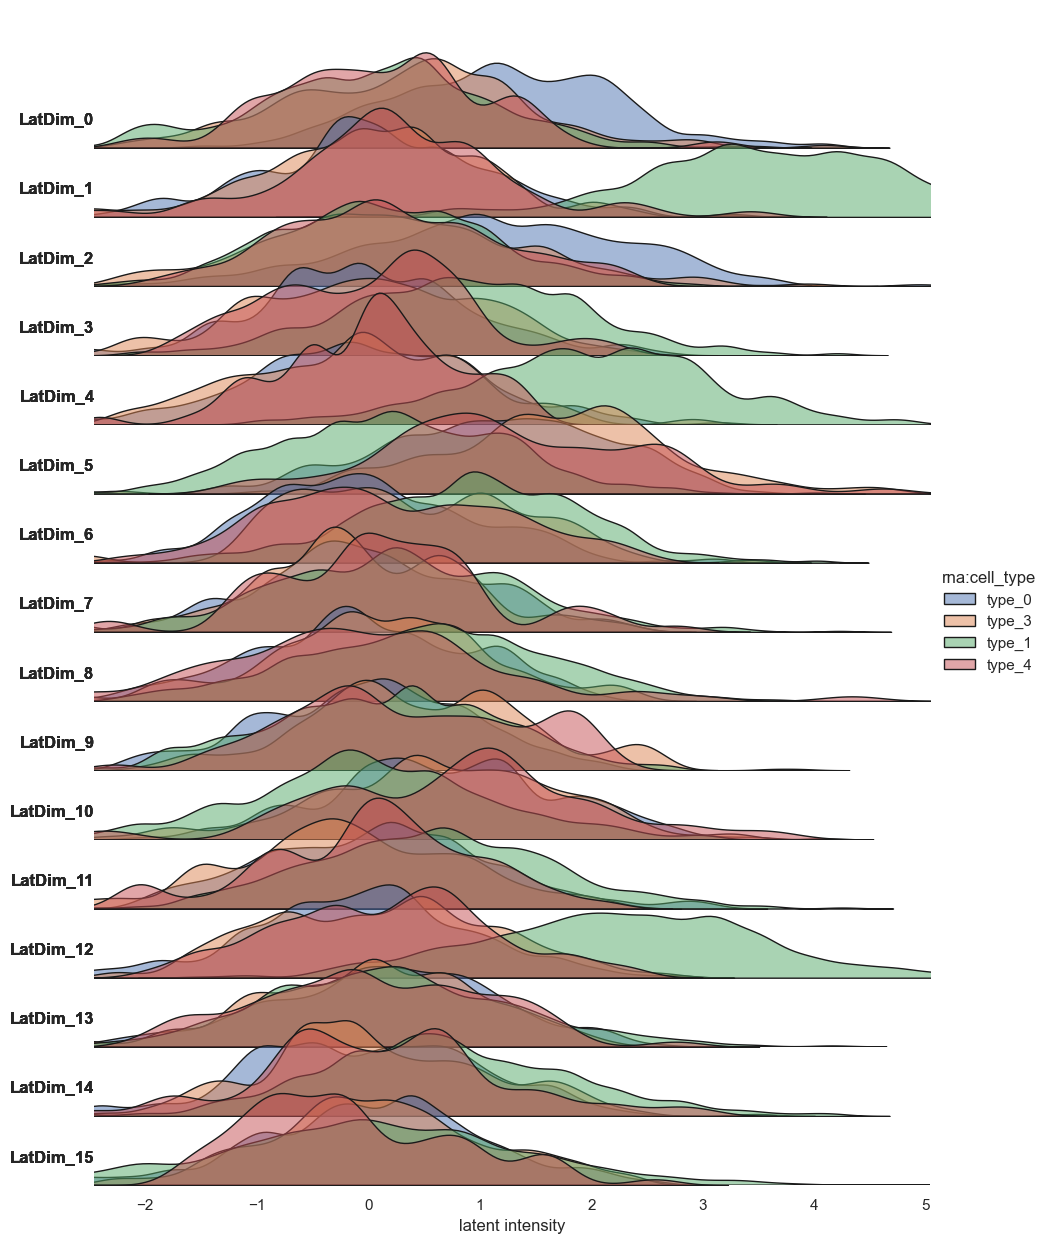

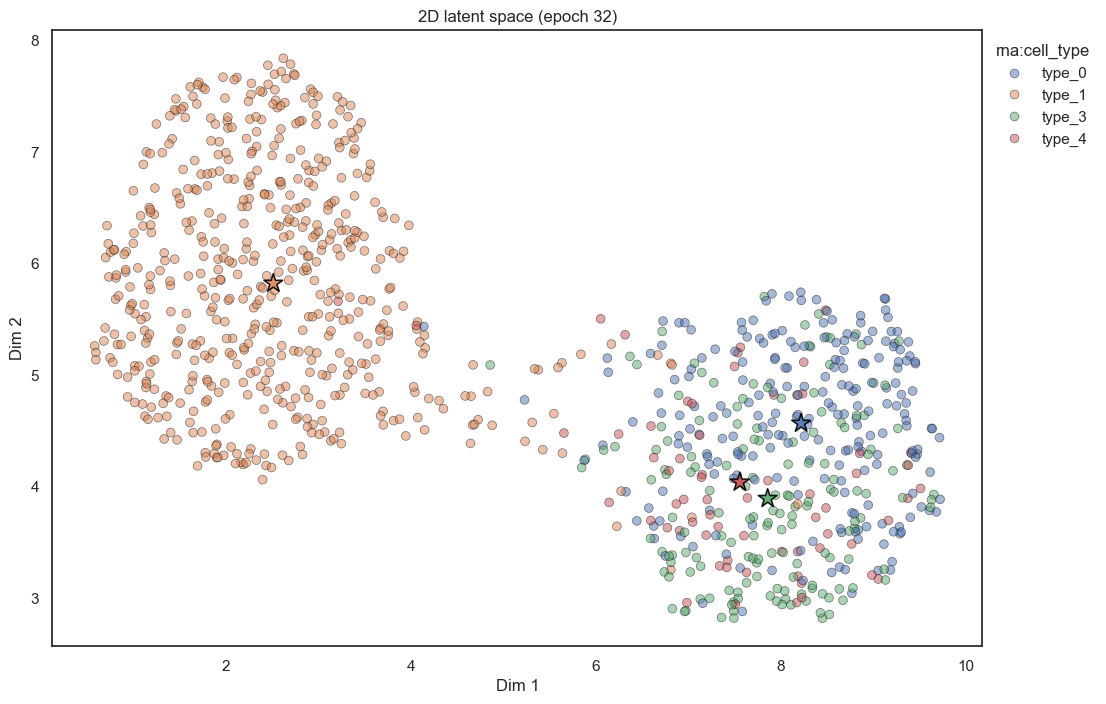

In [10]:
varix.result.datasets.test.metadata.head()

varix.show_result(params=["rna:cell_type"])

In [11]:
EXAMPLE_MULTI_SC.multi_sc["multi_sc"].obs_names

Index(['cell_0', 'cell_1', 'cell_10', 'cell_100', 'cell_101', 'cell_102',
       'cell_103', 'cell_104', 'cell_105', 'cell_106',
       ...
       'cell_990', 'cell_991', 'cell_992', 'cell_993', 'cell_994', 'cell_995',
       'cell_996', 'cell_997', 'cell_998', 'cell_999'],
      dtype='object', length=1000)

## 5) Customize Varix

To customize the behavior of our pipeline, you adjust the configuration.  
There are two ways to work with the config:

1. Create a customized instance of the config class.  
2. Provide a `yaml` file and use the config class to read it.  

We will focus on option 1 and show a few examples. For a deeper dive into configurations, please refer to `Tutorials/DeepDives/ConfigTutorial.ipynb` <br>

In this section, we demonstrate some Varix-specific parameters:
- Loss term  
- Beta  
- Annealing strategy  
- Retrieve information about all config parameters


In [12]:
from autoencodix.configs import VarixConfig
custom_config = VarixConfig(default_vae_loss="mmd", beta=1.5, anneal_function="logistic-late", data_case=DataCase.MULTI_SINGLE_CELL)
custom_varix = acx.Varix(config=custom_config, data=EXAMPLE_MULTI_SC)
result = custom_varix.run()

in handle_direct_user_data with data: <class 'autoencodix.data.datapackage.DataPackage'>
mudata: View of MuData object with n_obs × n_vars = 1000 × 700
  2 modalities
    rna:	1000 x 500
      obs:	'cell_type', 'batch', 'donor', 'cell_cycle', 'n_genes'
      uns:	'log1p'
    protein:	1000 x 200
      obs:	'cell_type', 'batch', 'donor', 'cell_cycle', 'n_genes'
      uns:	'log1p'
Processing 1 MuData objects: ['multi_sc']
Processing train modality: multi_sc
Processing valid split
Processing valid modality: multi_sc
Processing test split
Processing test modality: multi_sc
type of x in combine layers: <class 'numpy.ndarray'>
type of x in combine layers: <class 'numpy.ndarray'>
type of x in combine layers: <class 'numpy.ndarray'>
type of x in combine layers: <class 'numpy.ndarray'>
type of x in combine layers: <class 'numpy.ndarray'>
type of x in combine layers: <class 'numpy.ndarray'>
Epoch 1 - Train Loss: 28.6150
Sub-losses: recon_loss: 28.6150, var_loss: 0.0000, anneal_factor: 0.0000, eff

## 6) Re-use, Save, Load
There are not `Varix` specific steps here. See the `Getting Started - Vanillix` for details. Below is a basic save/load usecase:

Preprocessor saved successfully.
saving memory efficient
Pipeline object saved successfully.
PKL files: ['tutorial_res/disent.pkl.pkl', 'tutorial_res/stackix.pkl', 'tutorial_res/van_preprocessor.pkl', 'tutorial_res/stackix.pkl_preprocessor.pkl', 'tutorial_res/varix.pkl_preprocessor.pkl', 'tutorial_res/van.pkl.pkl', 'tutorial_res/disent.pkl_preprocessor.pkl', 'tutorial_res/stackix_preprocessor.pkl', 'tutorial_res/van.pkl_preprocessor.pkl', 'tutorial_res/van.pkl', 'tutorial_res/varix.pkl.pkl', 'tutorial_res/stackix.pkl.pkl']
Model files: ['tutorial_res/disent.pkl_model.pth', 'tutorial_res/stackix.pkl_model.pth', 'tutorial_res/stackix_model.pth', 'tutorial_res/van_model.pth', 'tutorial_res/varix.pkl_model.pth', 'tutorial_res/van.pkl_model.pth']
Attempting to load a pipeline from tutorial_res/varix.pkl...
Pipeline object loaded successfully. Actual type: Varix
Preprocessor loaded successfully.
in handle_direct_user_data with data: <class 'autoencodix.data.datapackage.DataPackage'>
mudata: 

/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/visualize/_general_visualizer.py:51: UserWarning: We could not create visualizations for the loss plots.
This usually happens if you try to visualize after saving and loading the pipeline object with `save_all=False`. This memory-efficient saving mode does not retain past training loss data.

Original error message: Number of columns must be a positive integer, not 0
  warnings.warn(
/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/utils/_result.py:346: UserWarning: We could not create visualizations for the loss plots.
This usually happens if you try to visualize after saving and loading the pipeline object with `save_all=False`. This memory-efficient saving mode does not retain past training loss data.

Original error message: tuple index out of range
  warnings.warn(
/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/utils/_result.py:346: UserWarning: We could not create vis

Creating plots ...
Absolute loss plot not found in the plots dictionary
This happens, when you did not run visualize() or if you saved and loaded the model with `save_all=False`


<Figure size 0x500 with 0 Axes>

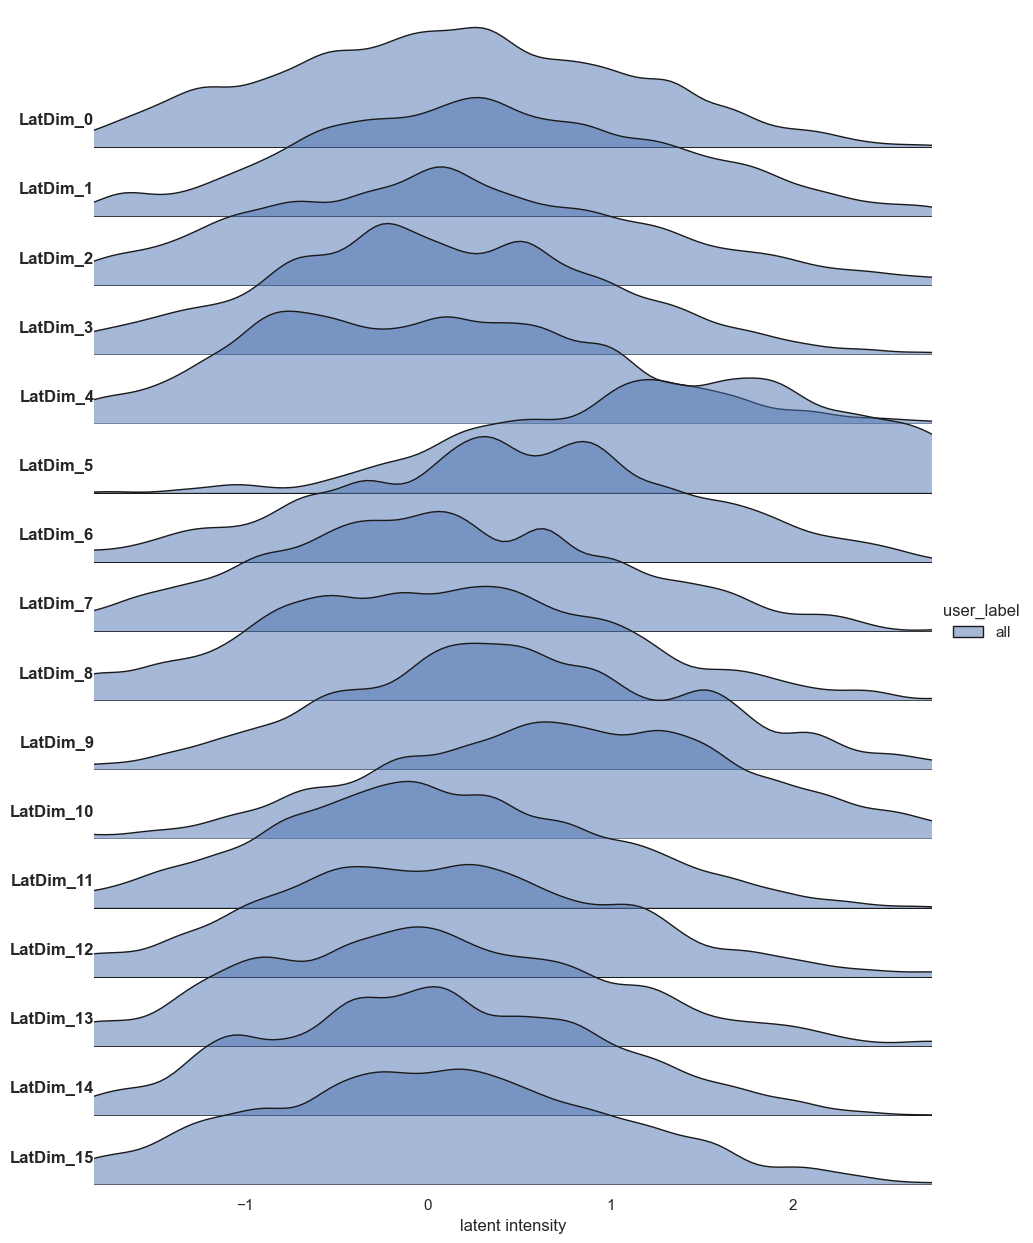

/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/utils/_result.py:346: UserWarning: We could not create visualizations for the loss plots.
This usually happens if you try to visualize after saving and loading the pipeline object with `save_all=False`. This memory-efficient saving mode does not retain past training loss data.

Original error message: tuple index out of range
  warnings.warn(
/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/utils/_result.py:346: UserWarning: We could not create visualizations for the loss plots.
This usually happens if you try to visualize after saving and loading the pipeline object with `save_all=False`. This memory-efficient saving mode does not retain past training loss data.

Original error message: tuple index out of range
  warnings.warn(


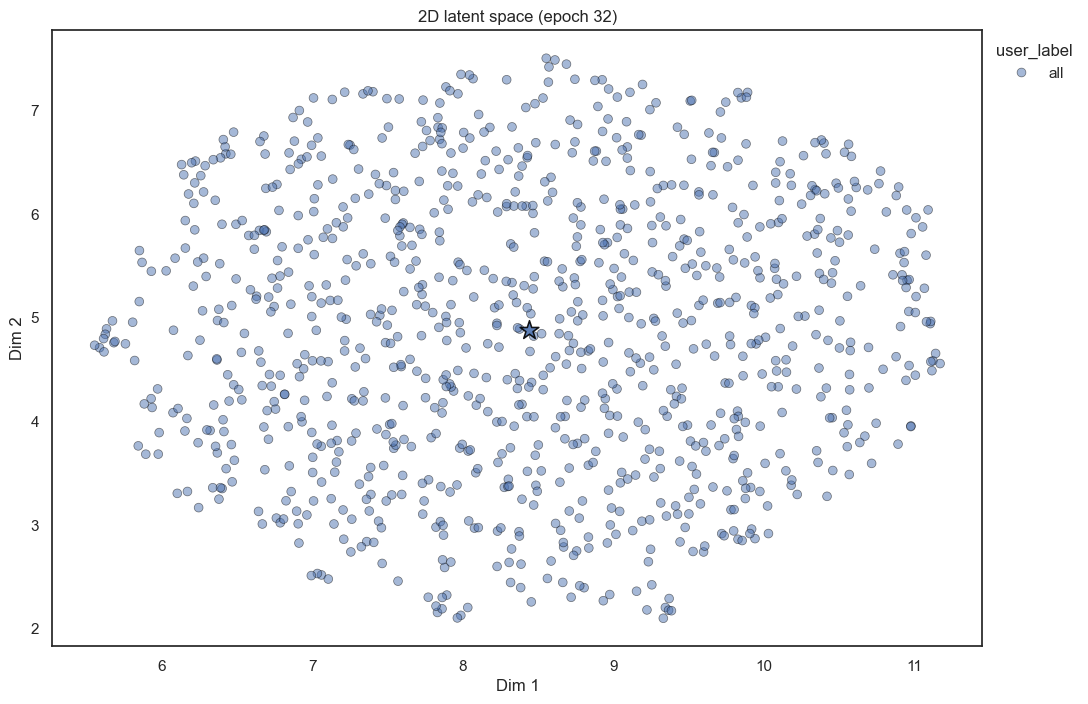

In [13]:
import os
import glob
# use a filename without extension, we handle this internally
outpath = os.path.join("tutorial_res", "varix")
varix.save(file_path=outpath)

folder = os.path.dirname(outpath)
pkl_files = glob.glob(os.path.join(folder, "*.pkl"))
model_files = glob.glob(os.path.join(folder, "*.pth"))

print("PKL files:", pkl_files)
print("Model files:", model_files)

# the load functionality automatically will build the pipeline object out of the three saved files
varix_loaded = acx.Varix.load(outpath)
varix_loaded.predict(data=EXAMPLE_MULTI_SC)
varix_loaded.visualize()
varix_loaded.show_result()

In [ ]:
varix_loaded.evaluate(backup_datset)

Perform ML task with feature df: Latent


/Users/maximilianjoas/development/autoencodix_package/src/autoencodix/base/_base_pipeline.py:894: UserWarning: The provided model is not a sklearn-type classifier. Evaluation continues but may produce incorrect results or errors.
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'train'

In [ ]:
backup_dataset